In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr 

# Load and clean data 
mxmh_df = pd.read_csv ('Resources/mxmh_survey_results.csv')


In [2]:
# Display columns with null values and how many
mxmh_df1 = mxmh_df.isnull().sum()
mxmh_df1

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [3]:
# Drop rows with null values
mxmh_clean_df = mxmh_df.dropna()
mxmh_clean_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [4]:
row_count = mxmh_clean_df.shape[0]
row_count

616

In [5]:
#calculate summary statistics for dataset 

summary_stats_df = pd.DataFrame(mxmh_clean_df)

# Generate summary statistics
summary_stats = summary_stats_df.describe()

# Display the summary statistics
print(summary_stats)

              Age  Hours per day           BPM     Anxiety  Depression  \
count  616.000000     616.000000  6.160000e+02  616.000000  616.000000   
mean    24.792208       3.702435  1.623500e+06    5.883929    4.894481   
std     11.658515       3.071961  4.029114e+07    2.758269    2.998005   
min     10.000000       0.000000  0.000000e+00    0.000000    0.000000   
25%     18.000000       2.000000  1.000000e+02    4.000000    2.000000   
50%     21.000000       3.000000  1.200000e+02    6.000000    5.000000   
75%     27.000000       5.000000  1.440000e+02    8.000000    7.000000   
max     89.000000      24.000000  1.000000e+09   10.000000   10.000000   

         Insomnia         OCD  
count  616.000000  616.000000  
mean     3.801136    2.659091  
std      3.111972    2.857285  
min      0.000000    0.000000  
25%      1.000000    0.000000  
50%      3.000000    2.000000  
75%      6.000000    5.000000  
max     10.000000   10.000000  


# Is there a relationship between age and the reported improvement in mental health from listening to music?



## #1 Pie Chart: Percentage of different age demographics who report mental health improvement from listening to music


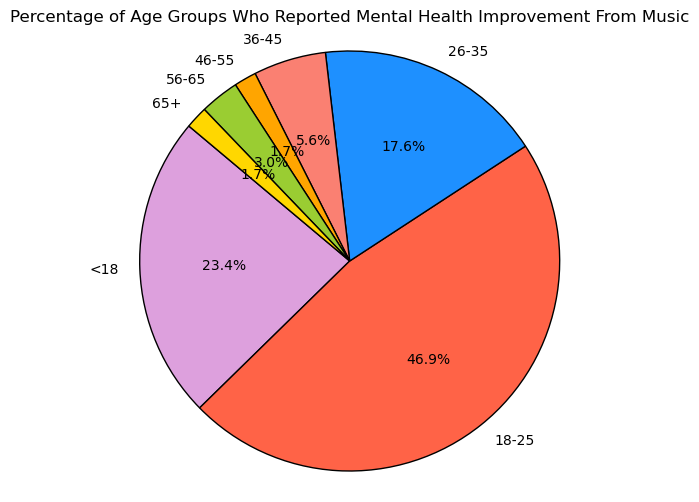

In [6]:

# Define age bins and labels
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Defining the age ranges
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']

mxmh_clean_df = mxmh_clean_df.copy()

# Create a new column 'Age Group' with the age bins
mxmh_clean_df['Age Group'] = pd.cut(mxmh_clean_df['Age'], bins=bins, labels=labels, right=False)

# Filter dataset to include only rows where 'Music effects' is 'Improve'
improvement_mxmh_df = mxmh_clean_df[mxmh_clean_df['Music effects'] == 'Improve']

# Count the number of people in each age group who rely on music for mental health improvement
age_group_counts = improvement_mxmh_df['Age Group'].value_counts().sort_index()

custom_colors=['plum', 'tomato', 'dodgerblue', 'salmon', 'orange', 'yellowgreen', 'gold']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'},
        colors=custom_colors)
plt.title('Percentage of Age Groups Who Reported Mental Health Improvement From Music')
plt.axis('equal')
plt.show()

### Explanation: 

There is a 18-25 age group dominance (46.9%). It is the largest segment of the pie chart, which indicates that nearly half of the participants who reported mental health improvement from music in the dataset, fall within this age group. This could suggest that young adults are particularly responsive to the benefits of music on mental health.

Other significant groups are the younger than 18 age group, which makes up a significant portion (23.4%), followed by the 26-35 age group (17.6%). This graph suggests that participants younger than 18 up to middle 30s report considerable mental health benefits from music. Participants between the ages of 36-45 make up a smaller portion (5.6%), while all those over 45 are even smaller, indicating a potential trend where younger people are more likely to report improvement, while middle aged people and older do not see improvement.

In [7]:
#Calculate: out of the 616 people from the cleaned dataset, how many reported improvement?
total_improved = improvement_mxmh_df.shape[0]
total_improved

465

In [8]:
# calculate specific numbers of reported mental health improvement for each age demographic 
age_group_count = improvement_mxmh_df['Age Group'].value_counts().sort_index()
age_group_count

Age Group
<18      109
18-25    218
26-35     82
36-45     26
46-55      8
56-65     14
65+        8
Name: count, dtype: int64

## #1 Linear Regression Plot: To visualize any trends in the different age demographics that report mental health improvement from music

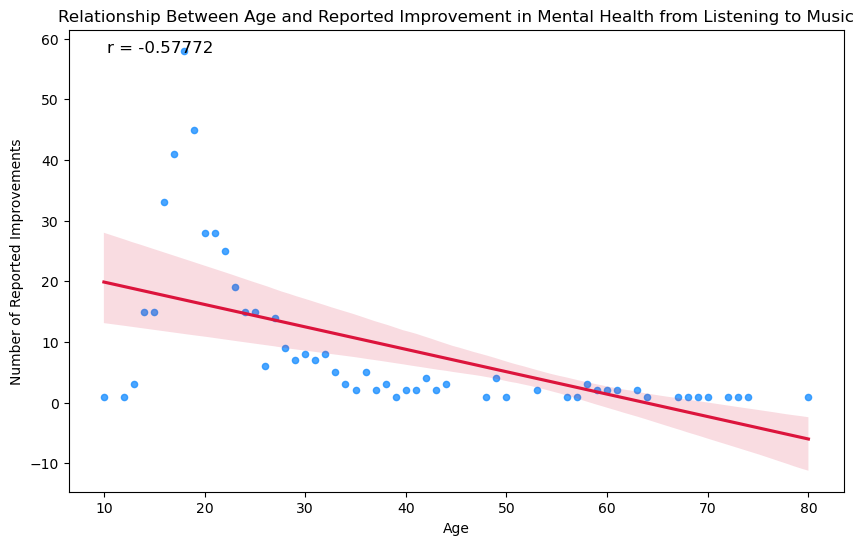

In [33]:

from scipy.stats import pearsonr

# Filter data to include only rows where music improves mental health ('Improve' in 'Music effects')
improve_mxmh_df = mxmh_clean_df[mxmh_clean_df['Music effects'] == 'Improve']

# Calculate the total number of reported improvements for each age
age_improvement_count = improve_mxmh_df.groupby('Age').size().reset_index(name='Improvement Count')

# Plotting the linear regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Improvement Count', data=age_improvement_count, scatter_kws={'s': 20, 'color':'dodgerblue'}, 
            line_kws={'color': 'crimson'})

plt.text(x=0.05, y=0.95, s=f'r = {r_value:.5f}', fontsize=12, transform=plt.gca().transAxes)

plt.title('Relationship Between Age and Reported Improvement in Mental Health from Listening to Music')
plt.xlabel('Age')
plt.ylabel('Number of Reported Improvements')
plt.show()



### Explanation

There is a negative linear relationship between age and reported improvement from music on mental health. The regression line slopes downward from left to right, indicating a decreasing correlation as age gets higher. In other words, as age increases, the number of people reporting mental health improvements from listening to music decreases.

There is a considerably high amount of improvement reports from younger participants. With the left side of the plot representing younger age groups, there is a higher density of points and larger counts. This indicates that younger people are more likely to report mental health benefits from music in the dataset.

The right side of the plot, representing older participants, shows a decline in the number of reported improvements from music. This indicates that as people age (past 30s), they are less likely to report mental health benefits from music.

There is a considerable peak in the number of reported improvements around the age of 20, then decreases as age increases. This could indicate that young adults and teenagers are most likely to find music beneficial for their mental health in this dataset.

# How do the top 5 favorite music genres influence the mental health of the participants?


In [10]:
#find the top 5 genres based on fave genre columns 
top_5_genres = mxmh_clean_df['Fav genre'].value_counts().head()
top_5_genres

Fav genre
Rock                149
Pop                  97
Metal                77
Classical            38
Video game music     36
Name: count, dtype: int64

## #2 Grouped Bar Chart: Separate bars for each genre showing both positive and negative impacts, with different colors for improvement and worsening effects.

<Figure size 1200x600 with 0 Axes>

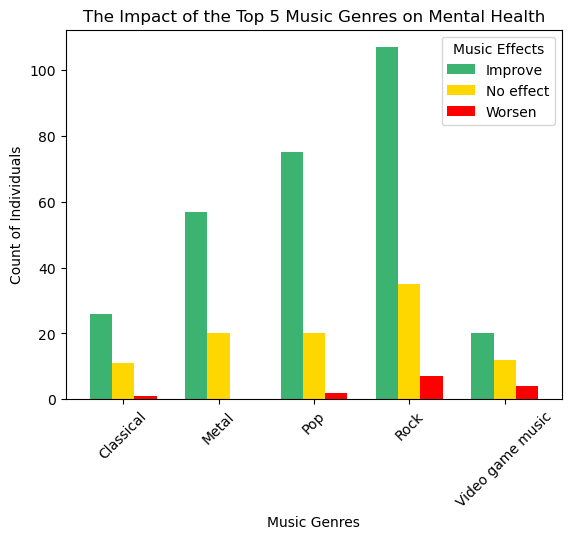

In [13]:

# Filter dataset to include only the top 5 genres and relevant music effects ('Improve', 'Worsen')
filtered_top_5_df = mxmh_clean_df[mxmh_clean_df['Fav genre'].isin(top_5_genres.index) & mxmh_clean_df['Music effects'].isin(['Improve', 'Worsen', 'No effect'])]

# Group by 'Fav genre' and 'Music effects' to get the count for each combination
genre_effect_counts_top5 = filtered_top_5_df.groupby(['Fav genre', 'Music effects']).size().unstack(fill_value=0)

custom_colors=['mediumseagreen','gold','red']

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
genre_effect_counts_top5.plot(kind='bar', width=0.7, color=custom_colors)
plt.title('The Impact of the Top 5 Music Genres on Mental Health')
plt.xlabel('Music Genres')
plt.ylabel('Count of Individuals')
plt.legend(title='Music Effects', loc='upper right')
plt.xticks(rotation=45)
plt.show()

### Explanation

The graph is filtered by the top 5 favorite genres of all 616 participants from the cleaned data. All the genres were taken from the 'Fav Genre' column, then how many times each genre appeared was counted, and the top 5 genres with most favorites determined the top 5 genres. 

The genre with most positive impact based on reported improvement in the top 5 was Rock. It had the highest number of people (over 100) reporting improvement in mental health, suggesting a strong positive impact for mental health from this genre. There is some considerable reports of no effect, suggesting some people do not listen to Rock with the intention of mental health improvement, or not experiencing any change. There is also some reports of it worsening their mental health, indicating a small margin of people are negatively impacted by Rock.

The genre with second most positive impact based on reported improvement in the top 5 was Pop. There is some reports of no effect for this genre, indicating some people do not listen to Pop with the intention of mental health improvement or not experiencing any change. There are very little reports of people who said Pop worsened their mental health, indicating a very small mixed impact on mental health. 

The third genre with the next considerable amount of reported improvements in the top 5 was Metal. This genre shows a moderate number of people reporting no effect on their mental health, but zero reports of people it worsened their mental health, which can both indicate a positive to neutral effect for mental health in the dataset.

The fourth genre with the next considerable amount of reported improvements in the top 5 was Classical. It also has some amount count for no effect on mental health and a considerably small amount for reports for worsen, indicating a more mixed or divisive impact on mental health.

The genre with the least reported improvements for mental health in the top 5 was Video game music. The amounts of reported "no effect" are not too far from the reported improvement amounts. Also, it has the second most reported "worsen" effects for the top 5 genres, following Rock. This can indicate an over all very mixed impact on mental health, or a poor genre for mental health improvement in the dataset.

## #2 Pie chart: To show the proportion of participants who report positive or negative impacts for each of the top 5 music genres.

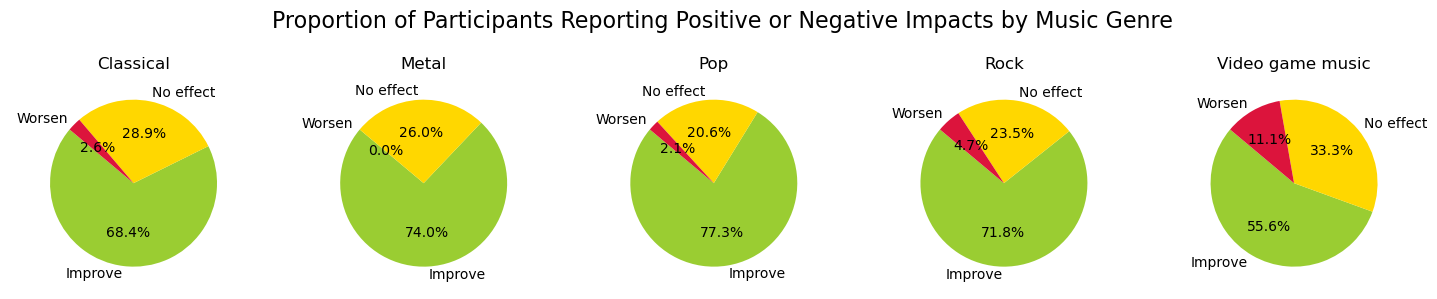

In [34]:
filtered_top_5_df = mxmh_clean_df[mxmh_clean_df['Fav genre'].isin(top_5_genres.index) & mxmh_clean_df['Music effects'].isin(['Improve',
'Worsen', 'No effect'])]

# Group by 'Fav genre' and 'Music effects' to get the count for each combination
genre_effect_counts_top5 = filtered_top_5_df.groupby(['Fav genre', 'Music effects']).size().unstack(fill_value=0)

# Plotting a pie chart for each genre
for genre in genre_effect_counts_top5.index:
    # Data for the current genre
    counts = genre_effect_counts_top5.loc[genre]

    custom_colors=['yellowgreen','gold','crimson']
# Create a figure with subplots
fig, axes = plt.subplots(1, len(genre_effect_counts_top5.index), figsize=(15, 3))  # Adjust the figsize as needed

fig.suptitle('Proportion of Participants Reporting Positive or Negative Impacts by Music Genre', fontsize=16)  

# Plotting a pie chart for each genre
for ax, genre in zip(axes, genre_effect_counts_top5.index):
    # Data for the current genre
    counts = genre_effect_counts_top5.loc[genre]
    
    # Plotting the pie chart on the respective axis
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
    ax.set_title(f'{genre}')
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle

plt.tight_layout()

### Explanation

The genres with the most positive impact are Pop and Metal. Both genres have the highest percentages of participants reporting improvement (77.3% and 74.0%, respectively), this indicates that these genres are the most beneficial for mental health among the surveyed participants.

The genre displaying mixed impact is Video Game Music, with a considerably high percentage reporting no effect (33.3%) and the highest percentage reporting a worsening effect (11.1%) for the total amount of people who listened to each genre.

In comparison to the total amount of participants who reported listening to each genre, most of the genres show very low percentages of participants reporting that their mental health worsened due to listening to that genre, with Metal having zero reported negative impacts (0.0%).

Across all genres, the "Improve" category generally dominates, suggesting that listening to music, in general, is more likely to have a positive impact on mental health than a negative or neutral one.

In [16]:
# Calculate how many people reported in each music effects category for the top 5 genres
effect_totals = genre_effect_counts_top5.sum(axis=0)

# Display the totals for each effect
print(effect_totals)

Music effects
Improve      285
No effect     98
Worsen        14
dtype: int64


In [17]:
#calculate the mean of the severity level (0-10, 0 being not experiencing it at all & 10 being experiencing it very frequently or extremely)
#for each mental health issue grouped by each music genre

relevant_columns = ['Fav genre', 'Anxiety', 'Depression', 'Insomnia', 'OCD']

# Filtering the data to only include relevant columns
filtered_df = mxmh_clean_df[relevant_columns]

average_severity_by_genre = filtered_df.groupby('Fav genre').mean(numeric_only=True)

# Display the result
print(average_severity_by_genre)

                   Anxiety  Depression  Insomnia       OCD
Fav genre                                                 
Classical         5.052632    4.368421  4.000000  2.447368
Country           5.700000    4.100000  2.600000  2.600000
EDM               5.361111    5.111111  3.944444  2.888889
Folk              6.640000    5.280000  4.040000  2.560000
Gospel            5.500000    3.500000  6.000000  0.500000
Hip hop           6.312500    6.093750  3.656250  2.656250
Jazz              5.684211    4.578947  4.052632  2.421053
K pop             6.523810    3.904762  3.190476  2.476190
Latin             5.000000    4.500000  4.500000  2.500000
Lofi              6.100000    6.600000  5.600000  3.400000
Metal             5.545455    5.194805  4.519481  2.272727
Pop               6.077320    4.407216  3.257732  2.943299
R&B               5.300000    4.166667  2.833333  2.666667
Rap               5.000000    3.750000  2.100000  3.150000
Rock              6.134228    5.379195  3.936242  2.6946

# Which music genre(s) are often correlated to improving specific mental health issues (anxiety, depression, OCD, & insomnia)?


## #3 Scatter Plot: To show the correlation between specific music genres and their impact on various mental health issues.

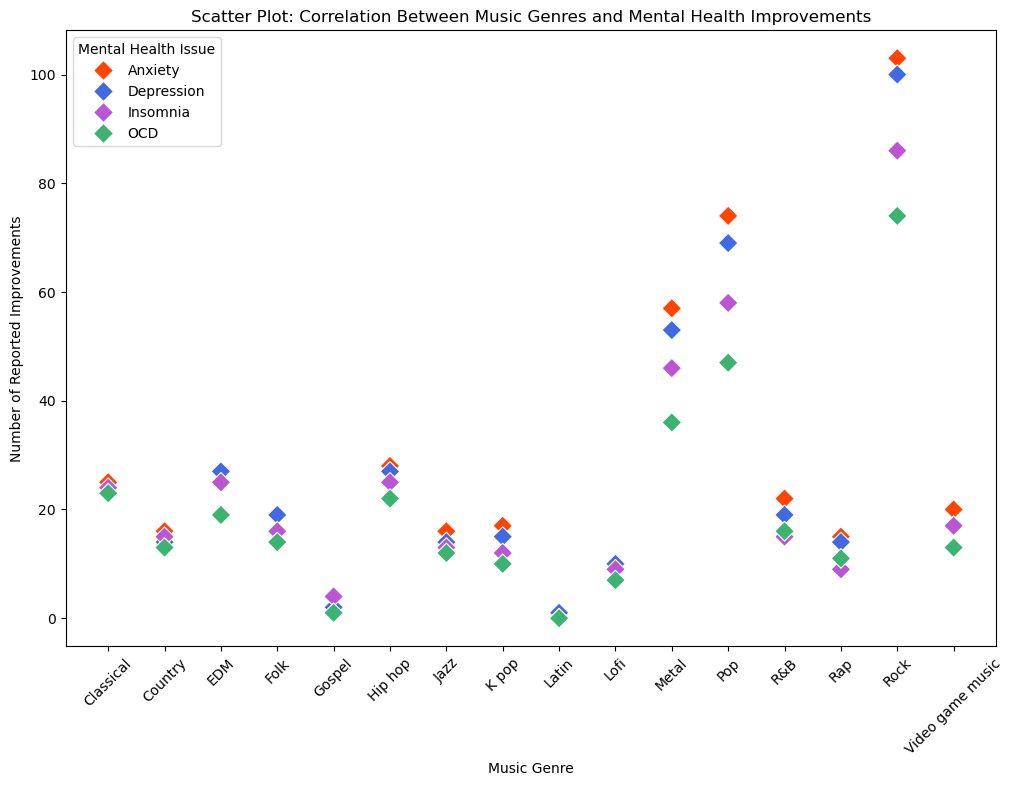

In [18]:

mental_health_columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Filter the data for participants who reported improvement
improved_genre_data = mxmh_clean_df[mxmh_clean_df['Music effects'] == 'Improve'].copy()

# Convert the severity ratings into binary improvement indicators (1 if reported improvement, 0 otherwise)
for col in mental_health_columns:
    improved_genre_data.loc[:, col] = improved_genre_data[col].apply(lambda x: 1 if x > 0 else 0)

# Count the number of improvements for each genre and mental health issue
genre_mental_health_improvement = improved_genre_data.groupby('Fav genre')[mental_health_columns].sum()

# Melt the pivot table into a long format suitable for scatter plotting
genre_mental_health_long = genre_mental_health_improvement.reset_index().melt(
    id_vars='Fav genre', 
    var_name='Mental Health Issue', 
    value_name='Improvement Count'
)

# Plotting the scatter plot
plt.figure(figsize=(12, 8))

custom_palette = {'Anxiety': 'orangered', 'Depression': 'royalblue', 'Insomnia': 'mediumorchid', 'OCD': 'mediumseagreen'}

# Scatter plot for each genre and its impact on different mental health issues
sns.scatterplot(
    data=genre_mental_health_long, 
    x='Fav genre', 
    y='Improvement Count', 
    hue='Mental Health Issue',
    palette=custom_palette,
    marker='D',
    s=100
)

plt.title('Scatter Plot: Correlation Between Music Genres and Mental Health Improvements')
plt.xlabel('Music Genre')
plt.ylabel('Number of Reported Improvements')
plt.xticks(rotation=45)
plt.legend(title='Mental Health Issue')
plt.show()


### Explanation

The genres with the highest reported improvements are Pop and Rock. Both of these genres show considerably high numbers of reported improvements for all four mental health issues, suggesting that these genres are largely more beneficial for mental health improvement for the participants in this dataset.

While lower than both Pop and Rock's high numbers of reported improvements, Metal has the next most high reported improvements for all mental health issues too, particularly for Depression and Insomnia.

The genres with lower reported improvements were Country, Folk, Jazz, and EDM. They display lower overall improvement counts across all mental health issues, suggesting a less significant impact on mental health for participants in this dataset.

There is also variation among mental health issue improvement in the dataset, particularly for depression. Depression generally displays higher reports of improvements across most genres, suggesting that most genres can improve the levels of depression for participants in this dataset. Furthermore, OCD generally has lower improvement reports on mental health from music across most genres in this dataset.

In terms of music for specific mental health issues, anxiety and depression show consistently high reports of mental health improvements from Pop & Rock in this dataset. For insomnia, Pop, Rock, and Metal show an association with high improvement reports for participants in this dataset.

## #3 Clustered Bar Chart: To compare the impact of different music genres on various specific mental health issues side by side, allowing for easy comparison within each mental health issue category.

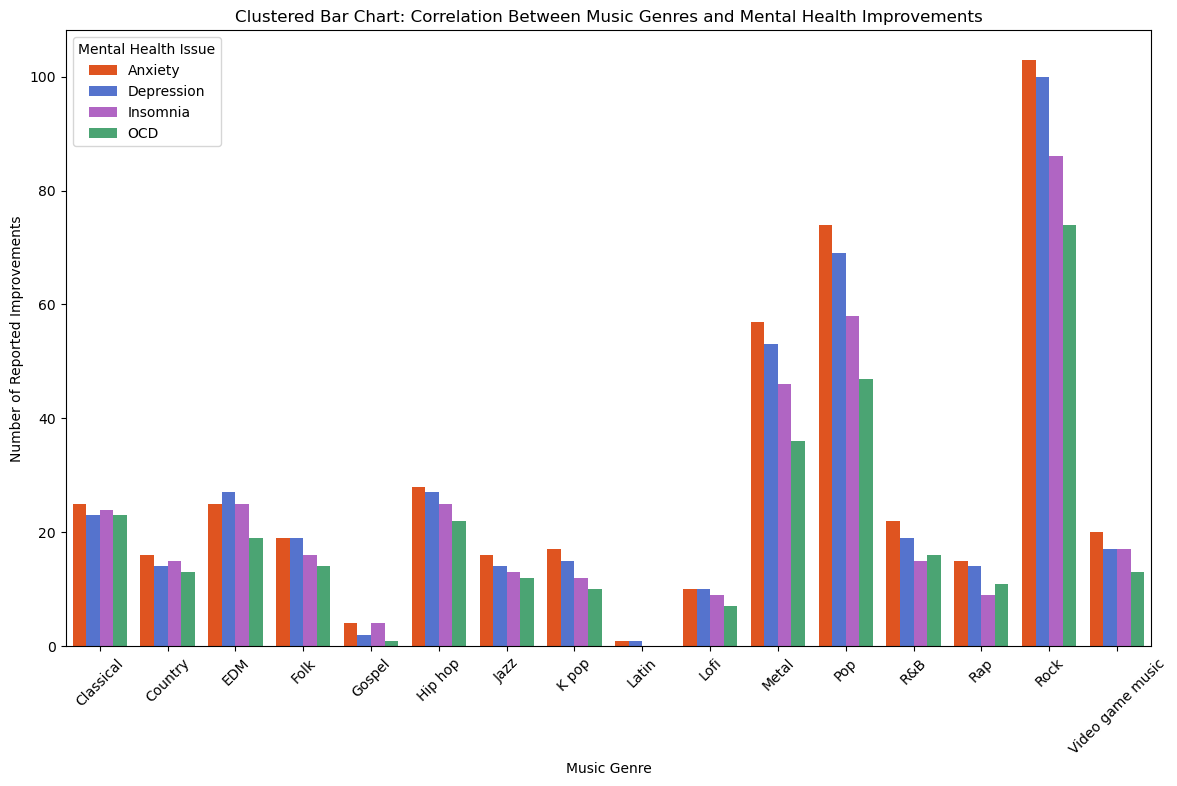

In [19]:

mental_health_columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Filter the data for participants who reported improvement
improved_genre_data = mxmh_clean_df[mxmh_clean_df['Music effects'] == 'Improve'].copy()

# Convert the severity ratings into binary improvement indicators (1 if reported improvement, 0 otherwise)
for col in mental_health_columns:
    improved_genre_data.loc[:, col] = improved_genre_data[col].apply(lambda x: 1 if x > 0 else 0)

# Count the number of improvements for each genre and mental health issue
genre_mental_health_improvement = improved_genre_data.groupby('Fav genre')[mental_health_columns].sum()

# Melt the pivot table into a long format suitable for clustered bar plotting
genre_mental_health_long = genre_mental_health_improvement.reset_index().melt(
    id_vars='Fav genre', 
    var_name='Mental Health Issue', 
    value_name='Improvement Count'
)

# Plotting the clustered bar chart
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(
    data=genre_mental_health_long,
    x='Fav genre',
    y='Improvement Count',
    hue='Mental Health Issue',
    palette=custom_palette
)

plt.title('Clustered Bar Chart: Correlation Between Music Genres and Mental Health Improvements')
plt.xlabel('Music Genre')
plt.ylabel('Number of Reported Improvements')
plt.xticks(rotation=45)
plt.legend(title='Mental Health Issue')
plt.show()

# What is the average hourly intake of music per day for participants who saw an improvement in mental health?


## #4 Box Plot: To show the distribution of daily music intake among participants who saw an improvement in mental health.

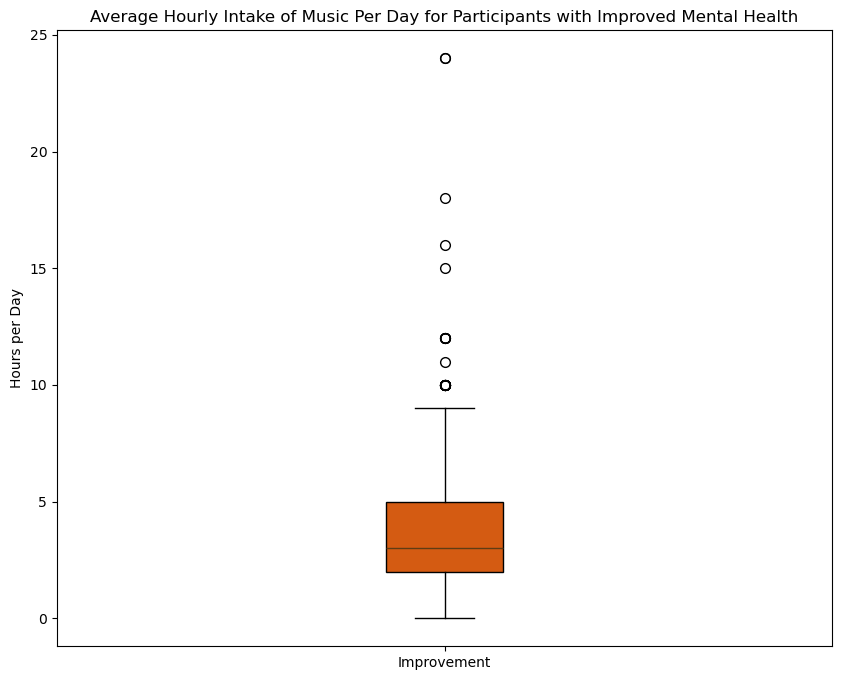

In [20]:

# Filter the data for participants who saw an improvement in mental health
improved_data = mxmh_clean_df[mxmh_clean_df["Music effects"] == "Improve"]

# Plotting the box plot for average hourly intake of music per day
plt.figure(figsize=(10, 8))
plt.boxplot(improved_data["Hours per day"], patch_artist=True,
            boxprops=dict(facecolor="#D45B12"),
            medianprops=dict(color="#603C14"),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"),
            flierprops=dict(marker="o", color="#9C2706", markersize=7))

# Label the x-axis with 'Improvement'
plt.xticks([1], ['Improvement'])

plt.title("Average Hourly Intake of Music Per Day for Participants with Improved Mental Health")
plt.ylabel("Hours per Day")
plt.show()

In [21]:
#calculate median for average hourly intake of music per day for people who reported improved mental health
improved_data['Hours per day'].median()

3.0

## #4 Histogram: Average hourly intake of music per day vs the level of reported mental health improvement to show a trend/correlation in data

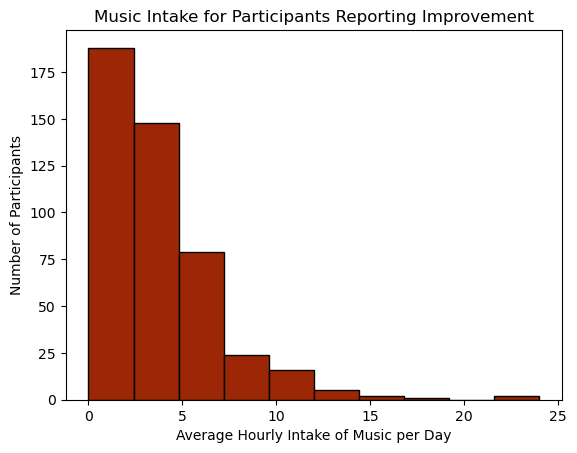

In [22]:

# Filter data for participants who reported improvement
improved_data = mxmh_clean_df[mxmh_clean_df["Music effects"] == "Improve"]

# Plot histogram
plt.hist(improved_data['Hours per day'], bins=10, color='#9C2706', edgecolor='black')
plt.xlabel('Average Hourly Intake of Music per Day')
plt.ylabel('Number of Participants')
plt.title('Music Intake for Participants Reporting Improvement')
plt.show()

In [23]:
#The mean of average hourly intake of music per day for improved mental health reports

improved_data['Hours per day'].mean()

3.7611827956989248

# Is there a significant relationship between music genre and daily listening duration for reported mental health improvement?


## #5 Bar plot: Displays number of average daily intake hours (least to greatest) for each music genre sorted by most improvement reported to least reported improvement by participants.

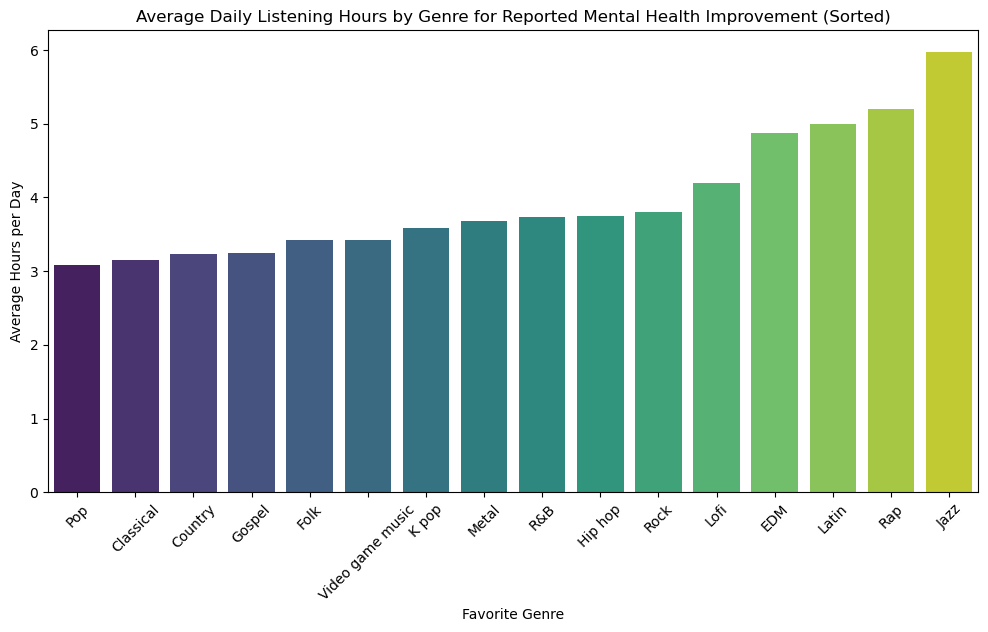

In [24]:
# Filter data for participants who reported improvement
improved_df = mxmh_clean_df[mxmh_clean_df['Music effects'] == 'Improve']

# Calculate the average hours per day of listening for each genre
average_hours_by_genre = improved_df.groupby('Fav genre')['Hours per day'].mean().reset_index()

# Sort the genres by average hours in ascending order
average_hours_by_genre_sorted = average_hours_by_genre.sort_values('Hours per day')

# Plotting the sorted bar plot with the hue parameter
plt.figure(figsize=(12, 6))
sns.barplot(data=average_hours_by_genre_sorted, x='Fav genre', y='Hours per day', hue='Fav genre', palette='viridis', dodge=False, legend=False)
plt.title('Average Daily Listening Hours by Genre for Reported Mental Health Improvement (Sorted)')
plt.xlabel('Favorite Genre')
plt.ylabel('Average Hours per Day')
plt.xticks(rotation=45)
plt.show()

## #5 Scatter Plot: To show the relationship between number of participants who reported mental health improvements and daily intake for  each music genre.


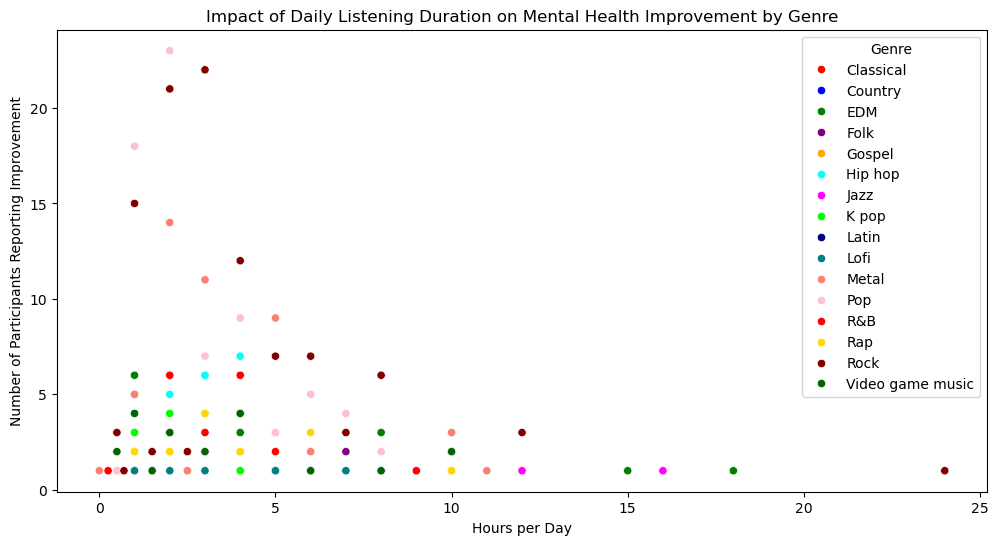

In [25]:

improved_df = mxmh_clean_df[mxmh_clean_df['Music effects'] == 'Improve']

# Group by 'Fav genre' and 'Hours per day' to find the average improvement rating
genre_duration_effect = improved_df.groupby(['Fav genre', 'Hours per day']).size().reset_index(name='Count')

custom_palette = {
    'Classical': 'red',
    'Country': 'blue',
    'EDM': 'green',
    'Folk': 'purple',
    'Gospel': 'orange',
    'Hip hop': 'cyan',
    'Jazz': 'magenta',
    'K pop': 'lime',
    'Latin': 'navy',
    'Lofi': 'teal',
    'Metal': 'salmon',
    'Pop': 'pink',
    'Rap': 'gold',
    'R&B': 'red',
    'Rock': 'maroon',
    'Video game music': 'darkgreen'}
# Plotting the relationship between daily listening hours and the number of participants who reported improvement
plt.figure(figsize=(12, 6))
sns.scatterplot(data=genre_duration_effect, x='Hours per day', y='Count', hue='Fav genre', palette=custom_palette)
plt.title('Impact of Daily Listening Duration on Mental Health Improvement by Genre')
plt.xlabel('Hours per Day')
plt.ylabel('Number of Participants Reporting Improvement')
plt.legend(title='Genre')
plt.show()